**Project**:- **Credit Risk Model To Determine Accuracy of the Model**


In [ ]:
#numerical python
import numpy as np
#panel data
import pandas as pd
#matlab plot library
import matplotlib.pyplot as plt
dataset=pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Our Y variable is Exited. The X's are credit score,geography,gender,age,tenure,numofproducts,balance,HasCrcard,isactive member,estimated salary. The business believes that these X's impact the outcome Y. There are three more columns which are redundant from an analysis perspective row number and  and surname.
Gender and Geography are categorical variables which have not been coded. HasCrcard and isActivemember also appear to be categorical variables but have been encoded.
Remove the redundant columns



In [ ]:
#iloc helps to locate rows and columns from where we want to pick up the data, in this case : signifies picking up all the rows
#3:13 signifies picking up columns numbers 3:13. This data is in the form of panel data which will not allow further mathematics to happen
#so we need to convert it into numerical python array
#In short we need numpy array on which we can work
#This is achieved by putting values
#The value 13 does not reflect the last column, Python stops at 13-1=12th column
#Start:Stop--> start at a particular index but stop one before the defined stopping point
X=dataset.iloc[:,3:13].values
type(X)

numpy.ndarray

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


split the X's and Y's so that we can make a model where we input the X's and get the Y.

In [ ]:
#we have selected column 13, Exited as the y variable for all the rows
#we know that we selected all the rows because we have used:
#To make things work in python we have to convert the panel data into numpy array.
y=dataset.iloc[:,13].values
print(y)


[1 0 1 ... 1 1 0]


In [ ]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder=LabelEncoder()
X[:,2]=labelencoder.fit_transform(X[:,2])
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
X[:,1]=labelencoder.fit_transform(X[:,1])
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
#Get the library from sklearn.compose
from sklearn.compose import ColumnTransformer
#Onehot Encoder has been applied to column1 
# I have given the columnttansformer function a name of my choice which is country 
# The functionlity has been passed onto the variable ct but still not applied on the data
ct=ColumnTransformer([("country",OneHotEncoder(),[1])],remainder='passthrough')
X=ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

Convert data type from numpy array to pandas

In [ ]:
X=pd.DataFrame(X,columns=["X1","X2","X3","Credit Score","Gender","Age","Tenure","Balance","NumofProducts","HasCrCard","IsActiveMember","EstimatedSalary"])
X

,X1,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,0,0,619,0,42,2,0,1,1,1,101349
1,0,0,1,608,0,41,1,83807.9,1,0,1,112543
2,1,0,0,502,0,42,8,159661,3,1,0,113932
3,1,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,771,1,39,5,0,2,1,0,96270.6
9996,1,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,1,0,0,709,0,36,7,0,1,0,1,42085.6
9998,0,1,0,772,1,42,3,75075.3,2,1,0,92888.5


we want to avoid dummy variable trap from country and hence we have to remove one of the variables from X1,X2,X3 and (this has to be done whenever we have n>2)
From table, drop X1 and axis=1 indicates where should python look for the variable X1, the answer is that it should look for X1 along the x-axis and hence axis is set to 1.
If looking along the y axis, the axis should be set to 0.

In [ ]:
X=X.drop("X1",axis=1)
X

,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,0,619,0,42,2,0,1,1,1,101349
1,0,1,608,0,41,1,83807.9,1,0,1,112543
2,0,0,502,0,42,8,159661,3,1,0,113932
3,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,771,1,39,5,0,2,1,0,96270.6
9996,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,0,0,709,0,36,7,0,1,0,1,42085.6
9998,1,0,772,1,42,3,75075.3,2,1,0,92888.5


In [ ]:
#split the dataset into training and test sets 
#The train_test_split library function is locatedin sklearn.model_selection
from sklearn.model_selection import train_test_split
#to ensure that all of us in this class have the same data under training and testing
#We have to set the random_state and make sure we all have same value
#in this case it is 0
#What is random state? It is like the seed that we use in Excel
#It ensures that everyone in the class has the same set of data records in training and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#Feature scaling
#if you standardize before splitiing the dataset will have only unique avg and std. However when we split it and do scaling
#the train data will have a different avg,std from the test data. So, standardizing train data using the mean and standard deviation of the 
#training sample is more accurate. Similarly standardizing the test data using the mean and standard deviation of the samples inside
#the test data is more accurate. Therefore, we must split it before we standardize the data to ensure accuracy of avg and std.
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
#fit_transform is done on the training data
#Model is learning the mean and variance from the train data aka fit
#After learning, it is implementing it aka transform
X_train=sc.fit_transform(X_train)
#transform is done on the test data
X_test=sc.transform(X_test)


*Changes* *Made*:-

**Hidden layers are two and number of nodes in the first hidden layer is 8 and the number of nodes in the second layer is 4. 
We used LeakyRelu as the activation function for both the hidden layers.
We are using LeakyRely because it speeds up training. It is proved that if the “mean activation” is close to 0 then it makes training faster. Unlike ReLU, leaky ReLU is more “balanced,” and may therefore learn faster.
We used ADAM as our optimizer because it is the most efficient converging optimizer. The loss function is binary cross entropy.
We used Sigmoid as activation function for the output layer because we are getting the binary output.
We started initially with a batch size of 20 and incremented it by 10 till the batch size reached 300.
We have taken 1000 epochs for each  batch and iterated over the fluctuating batch size till it reached the maximum efficiency.
Since we are interested in increasing the accuracy after making these changes we are able to increase the accuracy till 86.5%**

Streaming output truncated to the last 5000 lines.
Epoch 503/1000
400/400 [==============================] - 1s 2ms/step - loss: 0.3257 - accuracy: 0.8687
Epoch 504/1000
400/400 [==============================] - 1s 2ms/step - loss: 0.3194 - accuracy: 0.8717
Epoch 505/1000
400/400 [==============================] - 1s 3ms/step - loss: 0.3334 - accuracy: 0.8634
Epoch 506/1000
400/400 [==============================] - 1s 3ms/step - loss: 0.3209 - accuracy: 0.8710
Epoch 507/1000
400/400 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8634
Epoch 508/1000
400/400 [==============================] - 1s 3ms/step - loss: 0.3332 - accuracy: 0.8623
Epoch 509/1000
400/400 [==============================] - 1s 2ms/step - loss: 0.3336 - accuracy: 0.8643
Epoch 510/1000
400/400 [==============================] - 1s 2ms/step - loss: 0.3186 - accuracy: 0.8708
Epoch 511/1000
400/400 [==============================] - 1s 2ms/step - loss: 0.3258 - accuracy: 0.8676
Epoch 512/100

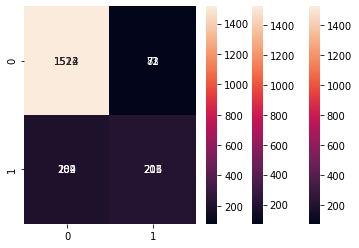

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
import seaborn as sns
from sklearn.metrics import confusion_matrix

classifier=Sequential()
lrelu=LeakyReLU(alpha=0.05)

#Adding first hidden layer has 8 units, weights are taken randomly from uniform distribution and activation is relu
classifier.add(Dense(units=8,kernel_initializer='uniform',activation=lrelu,input_dim=11))
#Adding the second hidden layer
classifier.add(Dense(units=4,kernel_initializer='uniform',activation=lrelu))


#Adding the output layer(Activation function is sigmoid as it is binary classification problem)
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
#binary loss error function

#compiling the dnn
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#fittinf the DNN to the training set
epoch_begin=150
for i in (20,300,10):
  classifier.fit(X_train,y_train,batch_size=i,epochs=1000)
  #proceed

  #Predicting the test results
  #send the test data through the trained model and get the probability of prediction
  #Determine if the value is less than or more than the cut off value
  y_pred=classifier.predict(X_test)
  #Here i have chosen 0.5 as the cut off value
  #if it is more than 0.5 then i have assigned it 1 otherwise 0
  #y_test has the actual class information which we will compare the predicted class information
  y_pred=(y_pred>0.5)

    #Making the consuion matrix
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(cm,annot=True,fmt='')
  fn, fp, tn, tp = confusion_matrix(y_test,y_pred,labels=[1,0]).reshape(-1)
  print(tp, fn, fp, tn)
  E=(tp+fn)/(tp+fn+fp+tn)
  if E>=87:
   break
  else:
    epoch_begin=epoch_begin+50
print(E)
  
    





In [ ]:
(1514+216)/2000

0.865

In [ ]:
#New customer
#Geography:France(0,0)
#credit score:600
#Gender:Male(1)
#Age:40 years old
#Tenure:30 years
#Balance:$60000
#Number of products:2
#does this customer has a credit card?Yes(1)
#is this customer an active member?Yes(1)
#Estimated salary:$50000
#Predict the class of this customer
#it is not straight forward
#The brackets for a numpy array in python is ([])
#So, why to use this brackets?
#SC.TRANSFORM will do the scaling.
new_customer=classifier.predict((sc.transform(np.array([[0,0,600,1,40,3,60000,2,1,1,50000]]))))
new_prediction=(new_customer>0.5)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import cross_val_score
#Make a user defined empty function.
#This function is called build_classifier
#Make sure you keep the : and dont delete the indentation
def build_classifier():
  classifier=Sequential()
  classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=11))
  classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
  classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
  classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return classifier
classifier=KerasClassifier(build_fn=build_classifier,batch_size=10,epochs=100)

#computation of accuracy scores
#The estimator used is the classifier, data and cross validation is 10,
#n_jobs is a python indicator to say if you are using GPU or not for processing
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,n_jobs=1)
mean=accuracies.mean()
variance=accuracies.std()

In [ ]:
#Tuning the DNN
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV
def build_classifier(optimizer):
  classifier=Sequential()
  classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=11))
  classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
  classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
  #Replace adam by the optimizer. be careful with case and spelling
  classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return classifier

classifier=KerasClassifier(build_fn=build_classifier)
#Create a dictionary of keys and values
parameters={'batch_size':[25,32],'epochs':[100,500],'optimizer':['adam','rmsprop']}

grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10)
grid_search=grid_search.fit(X_train,y_train)



In [ ]:
best_parameters=grid_search.best_params_
best_accuracy=grid_search.best_score_